In [93]:
import pandas as pd
import seaborn as sns

In [94]:
repo_dir = "/Users/ameliachu/repos/nlu-reddit-toxicity-dataset"
data_dir = f"{repo_dir}/data"

In [95]:
labelled_data_file_name = "labelled_master_data_2022-04-18.csv"
labelled_data_location = f"{data_dir}/{labelled_data_file_name}"

In [96]:
figures = {}
tables = {}

In [97]:
labelled_data = pd.read_csv(labelled_data_location)

In [98]:
labelled_data.head(5)

,example_id,preceding_comment,comment_for_evaluation,following_comment,toxicity,severe_toxicity,identity_attack,insult,profanity,threat
0,104857,[https://www.youtube.com/watch?v=hRBOnA0ak4w&a...,GME just watching this all and doing nothing lol,[https://www.youtube.com/watch?v=hRBOnA0ak4w&a...,0,0,0,0,0,0
1,105125,#GOTTA GET THAT 1.48% ON A BOND WHOOOO,"Everything is down today, knee jerk reaction t...","AMC, I held all this time and I decided to buy...",0,0,0,0,0,0
2,105684,Having 30k to lose sounds pretty nice to me,"No, this is the Warthog",a good trump tweet would turn all this carnage...,0,0,0,0,0,0
3,105904,His tools for inflation are literally rates an...,The market is not worth what you guys have bee...,Can somebody make clear that it's not us who a...,0,0,0,0,0,0
4,1138,Wot?,Didnt he sell all his shares?,This is the way lol holding 100 March 12 / $51...,0,0,0,0,0,0


In [99]:
labelled_data.count()

example_id                799
preceding_comment         799
comment_for_evaluation    799
following_comment         799
toxicity                  799
severe_toxicity           799
identity_attack           799
insult                    799
profanity                 799
threat                    799
dtype: int64

In [100]:
examples_with_missing_labels = labelled_data[labelled_data.isna().any(axis=1)]['example_id']

In [58]:
labelled_data[labelled_data.isna().any(axis=1)]

,example_id,preceding_comment,comment_for_evaluation,following_comment,toxicity,severe_toxicity,identity_attack,insult,profanity,threat
36,210983,"30 yr bond auction= 2.29%, not sure if that's ...",Imagine betting against tech\n\nLmao retard bo...,CPNG what the fuck,1,0,1,1,NaN,NaN


In [ ]:
36221, 267142, 301490 = ac4119
yj2369 = 98710
gm2858 = 210983

In [59]:
labels = ['toxicity', 'severe_toxicity', 'identity_attack', 'insult', 'profanity', 'threat']

In [91]:
overall_count = pd.DataFrame([{'data_label': 'overall',
               'number_of_examples': labelled_data.count()[0]}])
by_label_count = labelled_data.agg({l:sum for l in labels}).reset_index()
by_label_count.columns = ['data_label','number_of_examples']

tables['label_distribution'] = pd.concat([overall_count,by_label_count ]).reset_index(drop=True)

In [92]:
tables['label_distribution'] 

,data_label,number_of_examples
0,overall,800.0
1,toxicity,23.0
2,severe_toxicity,3.0
3,identity_attack,9.0
4,insult,49.0
5,profanity,113.0
6,threat,0.0


In [89]:
tables['label_corr'] = labelled_data[labels].corr('pearson')

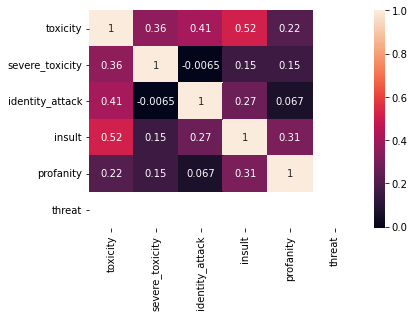

In [90]:
figures['label_corr'] = sns.heatmap(label_corr, annot=True)
figures['label_corr']